In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [24]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [25]:
df_subset = df[['area','rooms','price']]
df_subset.head()

,area,rooms,price
0,108,3,510000
1,47,2,215000
2,116,3,325000
3,58,3,315000
4,63,3,200000


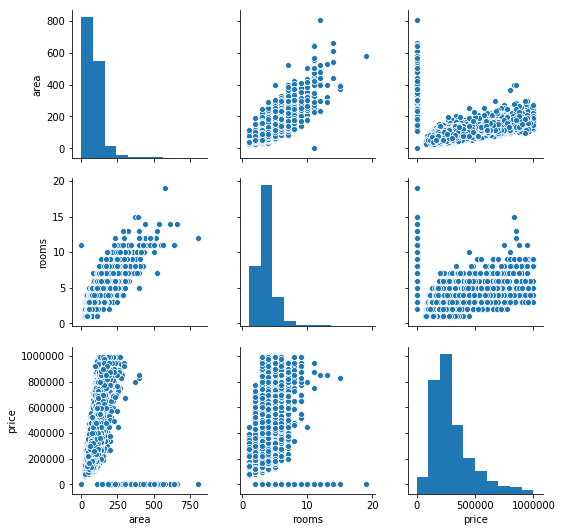

In [26]:
sns.pairplot(df_subset)
plt.show()

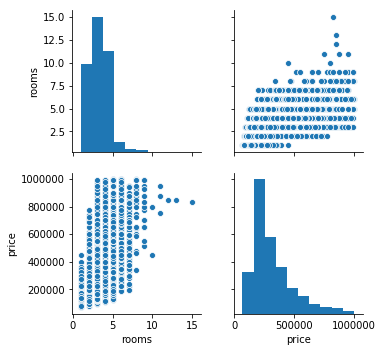

In [27]:
df = df[(df['price'] > 30000) & (df['area'] > 10) & (df['rooms'] > 0)] #we want to subset the original dataset, otherwise we lose data
df_sel = df[['rooms', 'price']]

sns.pairplot(df_sel)
plt.show()

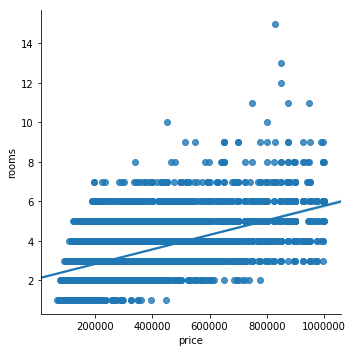

In [28]:

sns.lmplot(x='price', y='rooms', data=df) 

plt.show()

Their is a linearity between the price and the number of rooms. When their are more rooms the price is rising too.

In [29]:
pearsonr(df['price'],df['rooms'])

(0.540555973731477, 0.0)

The correlation between price and rooms is moderated uphill (positive) relationship

It is also highly significant: P < 0,001